# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [38]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

In [40]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")
api_key

'3753a4d3397a4313b64d27a75aa9463d'

In [44]:
newsapi = NewsApiClient(api_key=api_key)

In [46]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
)

In [47]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
)

In [52]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903


In [53]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806


In [54]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.018580,0.055650,0.048850,0.895450
std,0.410904,0.066291,0.053598,0.075186
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.840250
50%,0.000000,0.000000,0.057500,0.907500
75%,0.220025,0.108750,0.077750,0.927750
max,0.726400,0.178000,0.184000,1.000000


In [55]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.235065,0.078650,0.024550,0.896800
std,0.387401,0.068866,0.035195,0.065884
min,-0.381800,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.361200,0.077500,0.000000,0.920000
75%,0.528675,0.149250,0.067500,0.925000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

**Important note:** The sample answers may vary depending on when this code is running since news may change over time.

Q: Which coin had the highest mean positive score?

Ethereum had a higher mean positive score.

Q: Which coin had the highest compound score?

Bitcoin had the highest compound score.

Q. Which coin had the highest positive score?

Bitcoin had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenize

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word,
2. Remove punctuation.
3. Remove stopwords.

In [68]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [73]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [74]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [75]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[Like, Dogecoin, devotee, mayor, Reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[Filed, supply, chain, attack, reached, thousa..."
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightGetty, Images, gang, behind, ..."
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903,"[longtime, TechCrunch, reader, know, well, Mic..."


In [76]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[Bitcoin, Ethereum, Yuriko, Nakao, Ether, over..."
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[Anthony, Di, Iorio, co-founder, Ethereum, net..."
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[Ether, holder, staked, 13, billion, worth, cr..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [77]:
from collections import Counter
from nltk import ngrams

In [78]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 7),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('Reuters', 'Staff'), 4),
 (('El', 'Salvador'), 3),
 (('June', '21'), 3),
 (('21', 'Reuters'), 3),
 (('char', 'representation'), 3),
 (('representation', 'virtual'), 3),
 (('Bitcoin', 'seen'), 3),
 (('illustration', 'taken'), 3),
 (('Bitcoin', 'dipped'), 3),
 (('char', 'Reuters'), 3),
 (('Staff', 'June'), 3),
 (('25', 'Reuters'), 3),
 (('Bitcoin', 'dropped'), 3)]

In [79]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 6),
 (('world', 'biggest'), 5),
 (('char', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('Bitcoin', 'Ethereum'), 3),
 (('cryptocurrency', 'ethereum'), 3),
 (('Staff', 'June'), 3),
 (('Bitcoin', 'dipped'), 3),
 (('June', '21'), 3),
 (('21', 'Reuters'), 3),
 (('so-called', '“'), 2),
 (('char', 'Ether'), 2),
 (('Ether', 'holder'), 2),
 (('holder', 'staked'), 2),
 (('staked', '13'), 2)]

In [80]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [81]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Bitcoin', 19),
 ('Reuters', 15),
 ('June', 10),
 ('cryptocurrency', 8),
 ('2021', 5),
 ('world', 5),
 ('Monday', 4),
 ('seen', 4),
 ('illustration', 4)]

In [82]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 14),
 ('cryptocurrency', 11),
 ('Reuters', 10),
 ('Ethereum', 7),
 ('world', 7),
 ('network', 6),
 ('June', 6),
 ('biggest', 5),
 ('’', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [84]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

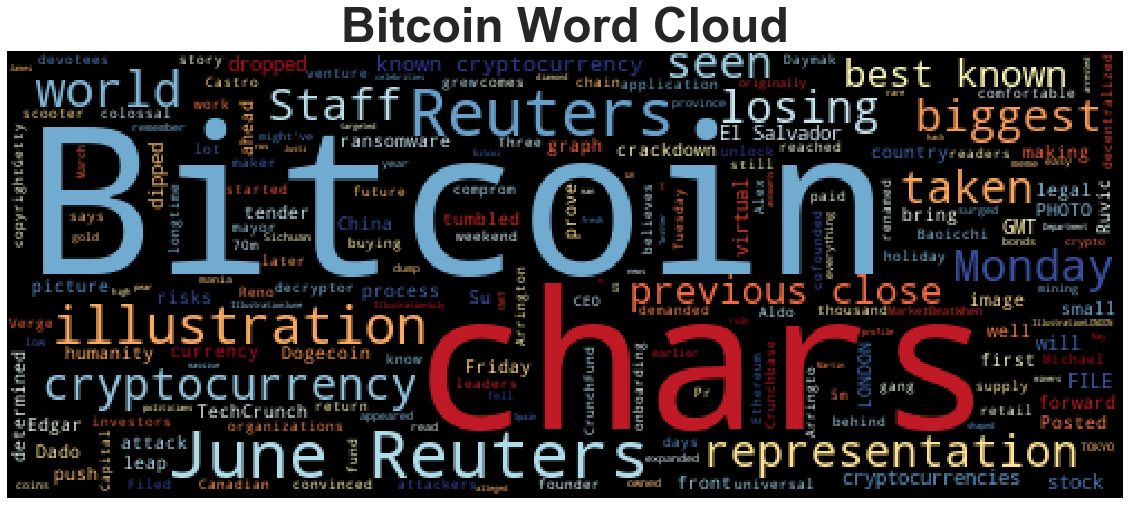

In [85]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

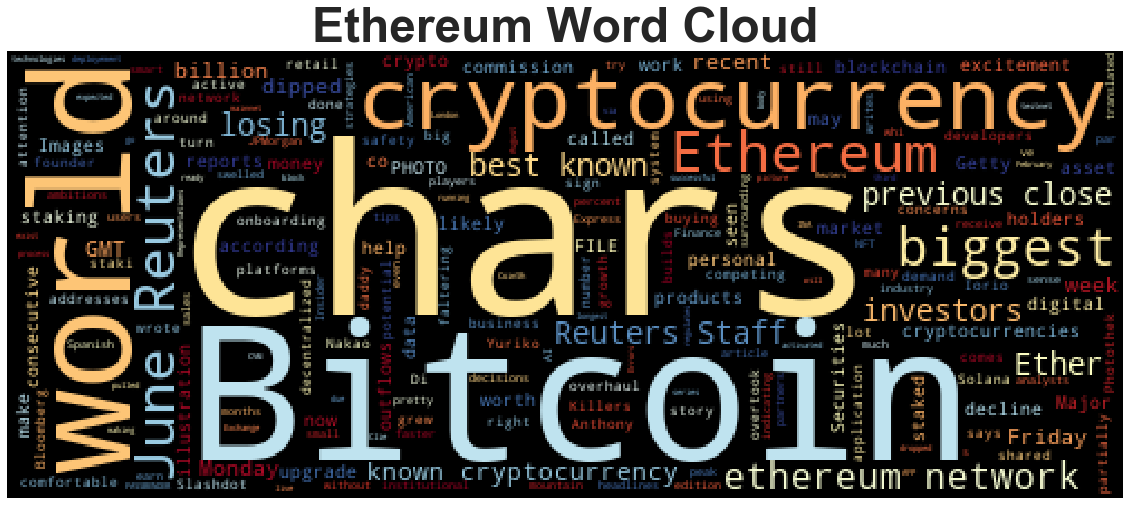

In [86]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [87]:
import spacy
from spacy import displacy

In [92]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---

## Bitcoin NER

In [93]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund

In [94]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [95]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [96]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
June 23 DATE
Reuters ORG
El Salvador GPE
earlier this year DATE
June 21 DATE
Reuters ORG
Monday DATE
China GPE
Sichuan GPE
as low as $32,288 MONEY
first ORDINAL
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
21 CARDINAL
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationJune 25 PERSON
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Monday DATE
China GPE
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/F

---

### Ethereum NER

In [97]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]"Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of personal safety concerns," reports Bloomberg, in a story shared by Slashdot… [+1550 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds around th

In [98]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [99]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [100]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Ethereum
 ORG
Yuriko Nakao PERSON
Friday DATE
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
recent months DATE
+2313 chars]Personal Finance Insider ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
AFP ORG
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MONEY
22:04 GMT TIME
Friday DATE
2,937.27 MONEY
21 CARDINAL
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9%